In [258]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

from sympy import symbols, diff
import sympy

In [259]:
dt = 0.1

x0 = 10
y0= 0

TLOW = -100
THIGH = 1100

DT = int((1 / dt) *(THIGH - TLOW))

t = np.linspace(TLOW, THIGH, DT)

In [260]:
r=1
k= 1000
h= 0

In [261]:
def X_dot(x,h,y):
    return (r*x*(1-(x/k))) - h

def Y_dot(x,y):
    return 1

In [262]:
def euler(t, h,dt, order):
    ans_x = [x0]
    ans_y = [y0]

    for i in range(1, DT):
        if order == 1:
            # first order
            ans_y.append(ans_y[i-1] + dt*Y_dot(ans_x[i-1],ans_y[i-1]))
            ans_x.append(ans_x[i - 1] + dt * X_dot(ans_x[i-1],h,ans_y[i-1]))
            
        
    return ans_x, ans_y

In [263]:
x = np.linspace(TLOW, THIGH, DT)
xd1= X_dot(x,0,0)
xd2= X_dot(x,100,0)
xd3= X_dot(x,500,0)



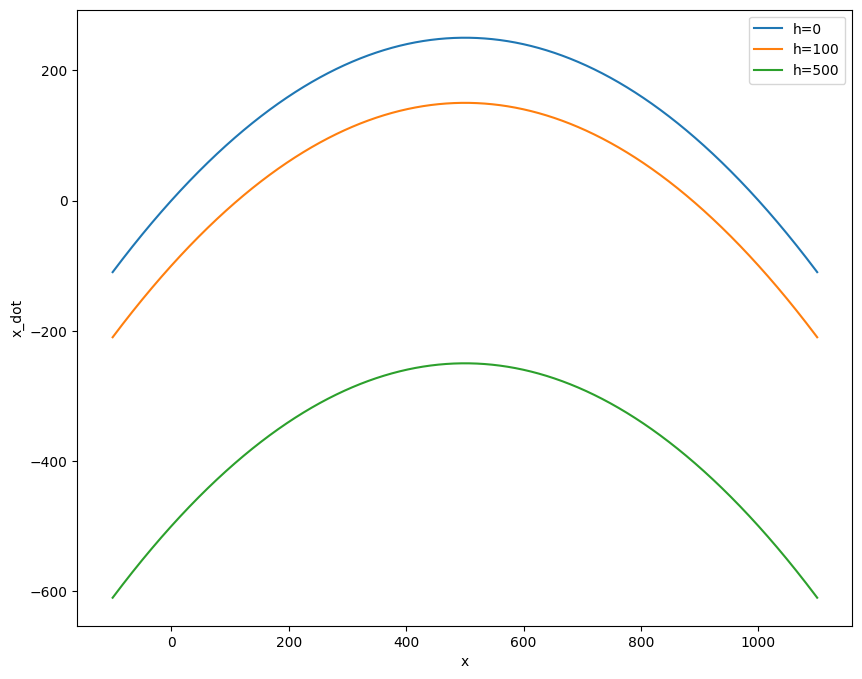

In [264]:
plt.figure(figsize=(10,8))
plt.xlabel('x')
plt.ylabel('x_dot')
plt.plot(x, xd1, label='h=0')
plt.plot(x, xd2, label='h=100')
plt.plot(x, xd3, label='h=500')
plt.legend()
plt.show()

# Plotting x(t) vs t


In [285]:
dt = 0.005

x0 = 10
y0= 0

TLOW = 0
THIGH = 1

DT = int((1 / dt) *(THIGH - TLOW))

t = np.linspace(TLOW, THIGH, DT)

In [286]:
xt1 , yt1 = euler(t,0,dt,1)
xt2 , yt2 = euler(t,100,dt,1)
xt3 , yt3 = euler(t,500,dt,1)


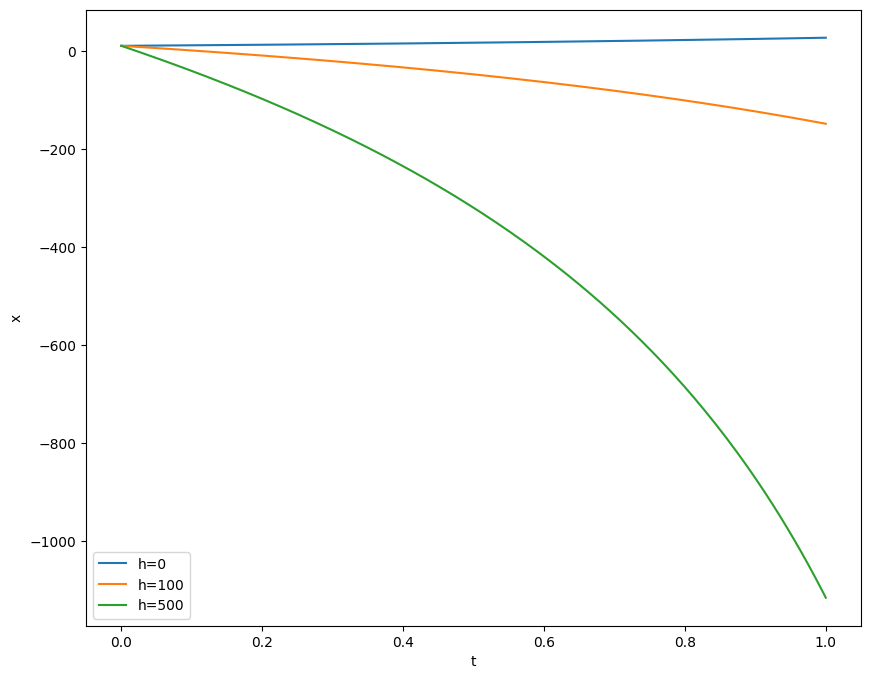

In [287]:
plt.figure(figsize=(10,8))  
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, xt1, label='h=0')
plt.plot(t, xt2, label='h=100')
plt.plot(t, xt3, label='h=500')
plt.legend()
plt.show()


# analytical soln


In [288]:
print(h)

0


In [289]:
def ret_x_dot(x,t):
    return (r*x*(1-(x/k))) - h



In [290]:
x_any = odeint(ret_x_dot, x0, t)

In [291]:
x_any=x_any.reshape(len(x_any))

In [292]:
err=x_any - xt1

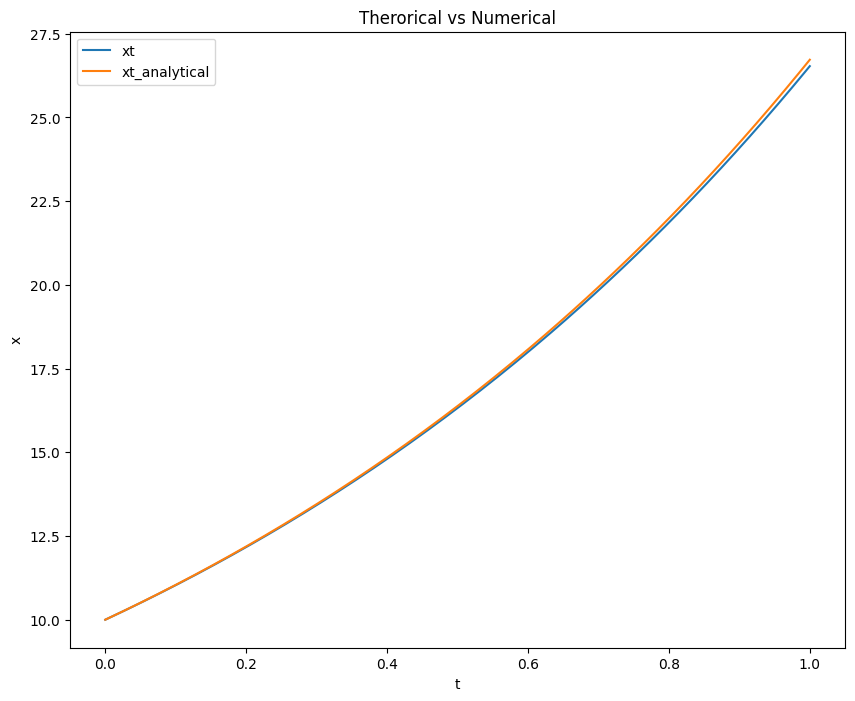

In [293]:
plt.figure(figsize=(10,8))  
# plt.figure(figsize=(10,8))  
plt.title("Therorical vs Numerical")
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, xt1, label='xt')
plt.plot(t, x_any, label='xt_analytical')
# plt.plot(t, xt3, label='h=500')
plt.legend()
plt.show()

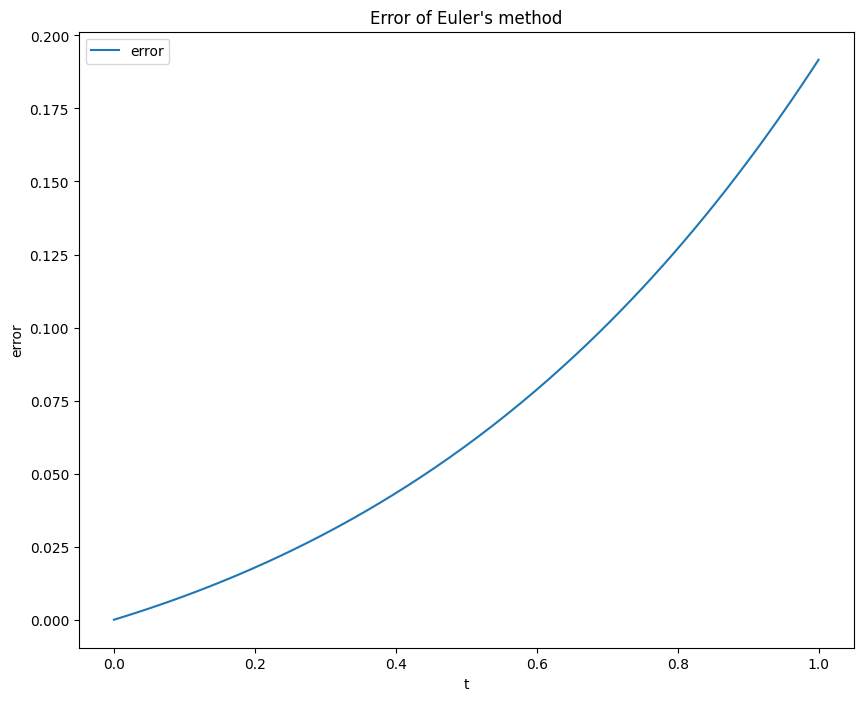

In [294]:
plt.figure(figsize=(10,8))  
plt.title("Error of Euler's method")
plt.xlabel('t')
plt.ylabel('error')
plt.plot(t, err , label='error')
plt.legend()
plt.show()